In [1]:
## Long Short Term Memory (LSTM) Recurrent Neural Network (RNN)
## This video was guided by the following tutorial: https://www.youtube.com/watch?v=QIUxPv5PJOY

## This program considers the past 60 day stock price for predictoions.

In [2]:
!pip install --upgrade pandas-datareader
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 8.8 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 4.0 MB/s 
     |████████████████████████████████| 110 kB 19.7 MB/s 
     |████████████████████████████████| 112 kB 40.3 MB/s 
     |████████████████████████████████| 128 kB 49.7 MB/s 
     |████████████████████████████████| 62 kB 664 kB/s 
     |████████████████████████████████| 4.1 MB 51.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found

In [3]:
# Importing relevant libraries

import math
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# Retrieve stock quotes

import yfinance as yf
yf.pdr_override() 

df = web.get_data_yahoo('FXAIX', start='2012-01-01', end='2019-12-17')

# Display data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,45.189999,45.189999,45.189999,45.189999,35.730057,0
2012-01-04,45.200001,45.200001,45.200001,45.200001,35.737972,0
2012-01-05,45.340000,45.340000,45.340000,45.340000,35.848667,0
2012-01-06,45.240002,45.240002,45.240002,45.240002,35.769588,0
2012-01-09,45.340000,45.340000,45.340000,45.340000,35.848667,0
...,...,...,...,...,...,...
2019-12-10,109.260002,109.260002,109.260002,109.260002,103.358086,0
2019-12-11,109.580002,109.580002,109.580002,109.580002,103.660812,0
2019-12-12,110.529999,110.529999,110.529999,110.529999,104.559494,0


In [5]:
# Retrieve matrix dimensions

df.shape

(2002, 6)

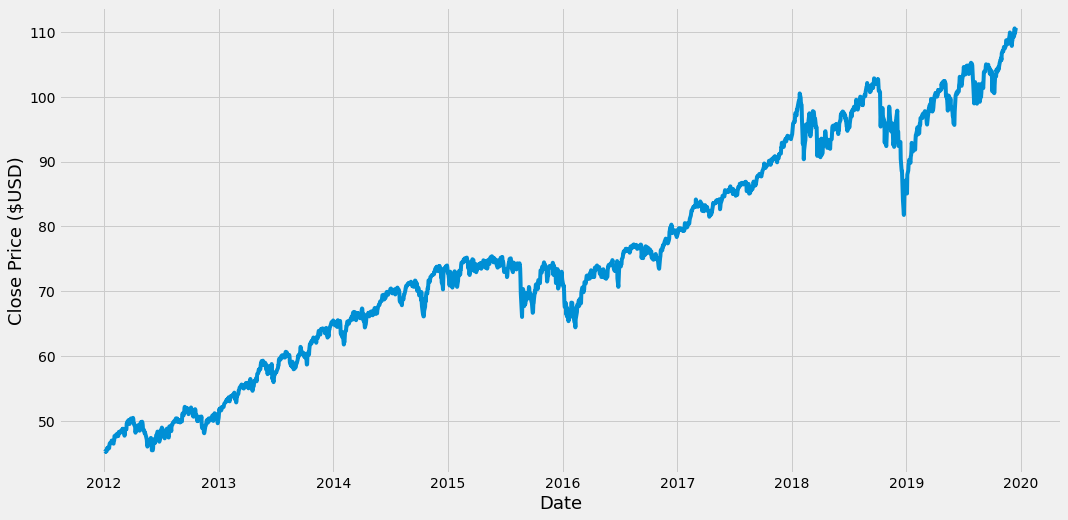

In [6]:
# Visualize the closing price

plt.figure(figsize=(16,8))
plt.title='Close Price History'
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($USD)', fontsize=18)

plt.show()

In [7]:
# Create a new dataframe with only closing prices

data = df.filter(['Close'])

# Convert dataframe to a numpy array
dataset = data.values

# Compute row count to train the model on => 80% of data for training
training_data_len = math.ceil(len(dataset) * 0.8)
print(training_data_len)

1602


In [8]:
# Scale the data for preprocessing

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)   # Computes min and max values for scaling, then transforms. Standardizes data from 0 to 1 inclusive

scaled_data

array([[0.00000000e+00],
       [1.52914482e-04],
       [2.29325067e-03],
       ...,
       [9.98929832e-01],
       [9.87922322e-01],
       [1.00000000e+00]])

In [9]:
# Create the training data set

# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

# Split data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])   # Positions 0 to 59
  y_train.append(train_data[i, 0])        # Position 60
  if i<= 61:
    print(x_train)
    print(y_train)
    print()


[array([0.        , 0.00015291, 0.00229325, 0.00076446, 0.00229325,
       0.0085614 , 0.00871426, 0.01039597, 0.00703261, 0.00947871,
       0.01727566, 0.02079194, 0.02140348, 0.02170925, 0.02094485,
       0.027213  , 0.02308519, 0.02201502, 0.0201804 , 0.01987468,
       0.02629569, 0.027213  , 0.03776183, 0.03745606, 0.03898491,
       0.04081948, 0.04188965, 0.03684452, 0.04188965, 0.04143102,
       0.03776183, 0.04586455, 0.04754626, 0.0481578 , 0.04571169,
       0.04892219, 0.05029813, 0.0513683 , 0.05396732, 0.0506039 ,
       0.05519035, 0.05289715, 0.04999236, 0.03867914, 0.04387713,
       0.05121545, 0.05381441, 0.05396732, 0.06772665, 0.06696225,
       0.07139584, 0.0723131 , 0.07537074, 0.07307755, 0.07170161,
       0.06619786, 0.06864396, 0.07919279, 0.07705245, 0.07338332])]
[0.07216023898049084]

[array([0.        , 0.00015291, 0.00229325, 0.00076446, 0.00229325,
       0.0085614 , 0.00871426, 0.01039597, 0.00703261, 0.00947871,
       0.01727566, 0.02079194, 0.02

In [10]:
# Convert x_train and y_train to numpy arrays 

x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
# Reshape the x_train data set => Add third column

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1542, 60, 1)

In [12]:
# Build the LSTM Model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [13]:
# Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')


In [14]:
# Train the model

model.fit(x_train, y_train, batch_size=1, epochs=1)

1542/1542 [==============================] - 59s 34ms/step - loss: 9.6637e-04


In [15]:
# Create the testing data set

# Array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [16]:
# Convert the data to a numpy array

x_test = np.array(x_test)


In [17]:
# Reshape the data 

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  # Num of rows, num of columns, num of features (just the close price)


In [18]:
# Retrieve model's predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)   # Unscale predictions to compare to original closing prices (y_test)



13/13 [==============================] - 1s 17ms/step


In [19]:
# Evaluate root mean square error (RMSE) => Standard deviation of the residuals

rmse = np.sqrt( np.mean( predictions - y_test )**2 )
print(rmse)

1.9259280395507812


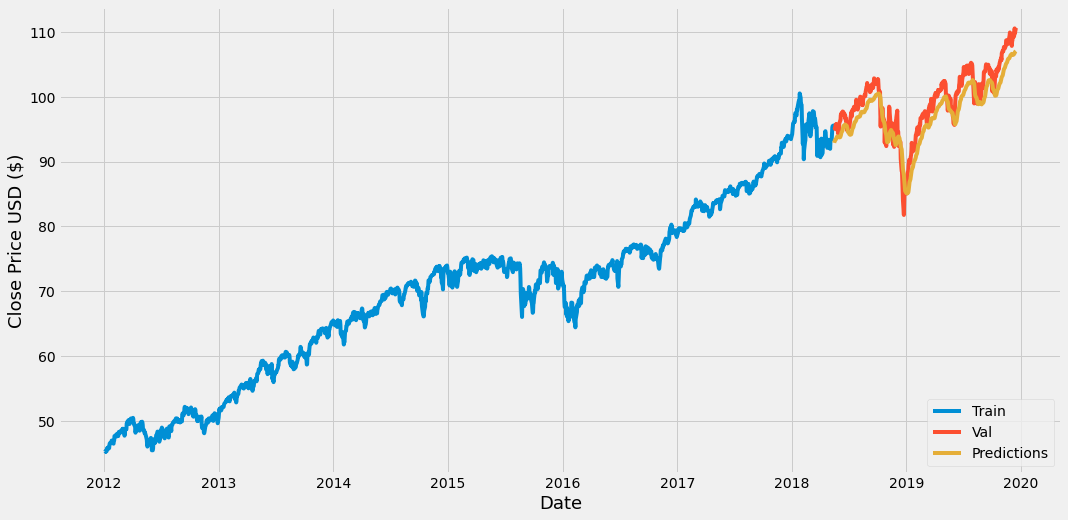

In [20]:
# Plot the data

train = data[:training_data_len].copy()  
valid = data[training_data_len:].copy()  

valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title='Model'
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [21]:
# Display valid and predicted prices

valid

,Close,Predictions
Date,,
2018-05-16,95.320000,92.880058
2018-05-17,95.269997,93.098572
2018-05-18,95.029999,93.274796
2018-05-21,95.730003,93.390823
2018-05-22,95.430000,93.530823
...,...,...
2019-12-10,109.260002,106.566856
2019-12-11,109.580002,106.634430
2019-12-12,110.529999,106.721710


In [22]:
# Predict closing price for ^GSPC stock on december 18, 2019

#.Retrieve actual quote
apple_quote=web.get_data_yahoo('FXAIX', start='2012-01-01', end='2019-12-17')

# Create a new dataframe
new_df = apple_quote.filter(['Close'])

# Retrieve only last 60 days of data and convert to array
last_sixty_days = new_df[-60:].values

# Scale the data to [0:1]
last_sixty_days_scaled = scaler.transform(last_sixty_days)

# Initialize list
new_x_test = []
new_x_test.append(last_sixty_days_scaled)

# Convert to numpy array
new_x_test = np.array(new_x_test)

# Reshape
new_x_test = np.reshape(new_x_test, (new_x_test.shape[0], new_x_test.shape[1], 1))

# Calculate predictions
pred_price = model.predict(new_x_test)

# Rescale predictions 
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 24ms/step
[[107.20101]]


In [23]:
# Evaluate efficacy of model

# Retrieve actual future quote data
actual_apple_quote=web.get_data_yahoo('FXAIX', start='2019-12-18', end='2019-12-19')
print(actual_apple_quote['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2019-12-18    110.599998
Name: Close, dtype: float64
